In [65]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_data(table, classify, dead):
    #DB연동
    conn = psycopg2.connect(host='localhost', dbname='test', user='postgres', password='1234', port='5432')

    cur = conn.cursor()
    
    if dead:
        sql = "select  " + table +" .person_id, concept.concept_name \
        from " + table +" \
        join death using(person_id) \
        join concept on  " + table +"." + classify + "_concept_id = concept.concept_id \
        order by  " + table +" .person_id"
    else:
        sql = "select  " + table +" .person_id, concept.concept_name \
        from " + table +" \
        join concept on  " + table +"." + classify + "_concept_id = concept.concept_id \
        order by  " + table +" .person_id"

    cur.execute(sql)
    datas = np.array(cur.fetchall())
    
    #결과값 dictionary로 저장
    result = dict()
    
    for data in datas:
        if data[1] not in result:
            result[data[1]] = 1
        else:
            result[data[1]] = result[data[1]] + 1
        
    
    cur.close()
    conn.close()

    return [datas, result]

#나이
def get_data_age(dead):
    #DB연동
    conn = psycopg2.connect(host='localhost', dbname='test', user='postgres', password='1234', port='5432')

    cur = conn.cursor()
    
    if dead:
        sql = "select person.person_id, substring(death.death_date, 1, 4)::Integer - year_of_birth::Integer as age \
        from person \
        join death using(person_id) \
        order by age"
    else:
        sql = "select person.person_id, 2020 - year_of_birth::Integer as age \
        from person \
        order by age"

    cur.execute(sql)
    datas = np.array(cur.fetchall())
    
    #결과값 dictionary로 저장
    result = dict()
    
    for data in datas:
        if data[1] not in result:
            result[data[1]] = 1
        else:
            result[data[1]] = result[data[1]] + 1
        
    
    cur.close()
    conn.close()

    return [datas, result]

#내원 일수
def get_data_visit(dead):
    #DB연동
    conn = psycopg2.connect(host='localhost', dbname='test', user='postgres', password='1234', port='5432')

    cur = conn.cursor()
    
    if dead:
        sql = "select person_id, sum(visit_end_date::date - visit_start_date::date + 1) as date \
        from visit_occurrence \
        join death using(person_id) \
        group by person_id \
        order by date"
    else:
        sql = "select person_id, sum(visit_end_date::date - visit_start_date::date + 1) as date \
        from visit_occurrence \
        group by person_id \
        order by date"

    cur.execute(sql)
    datas = np.array(cur.fetchall())
    
    #결과값 dictionary로 저장
    result = dict()
    
    for data in datas:
        if data[1] not in result:
            result[data[1]] = 1
        else:
            result[data[1]] = result[data[1]] + 1
        
    
    cur.close()
    conn.close()

    return [datas, result]


def draw_bar_chart(result, title=""):
    keys = result.keys()
    values = result.values()
    x = np.arange(len(result))

    plt.title(title)
    plt.bar(x, values)
    plt.xticks(x, keys)
    plt.show()
    
def get_table(dead_result, all_result):
    idx=['dead','all', 'percent']
    keys = all_result.keys()
    values = list()

    for key in keys:
        temp = list()
        temp.append(dead_result.get(key))
        temp.append(all_result.get(key))
        if key in dead_result:
            temp.append(int(dead_result.get(key)/all_result.get(key) * 100))
        
        values.append(temp)

    df = pd.DataFrame(values, columns=idx, index=keys)
    print(df)

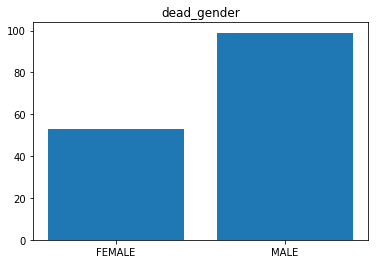

{'FEMALE': 53, 'MALE': 99}


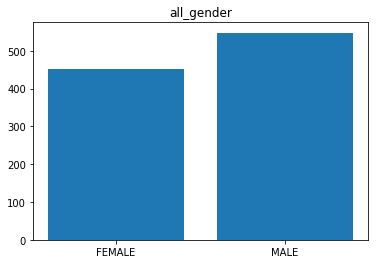

{'FEMALE': 452, 'MALE': 548}
        dead  all  percent
FEMALE    53  452       11
MALE      99  548       18


In [80]:
#데이터 분석에 쓸 데이터 얻어오기
#그 데이터를 바 형식으로 그리기

#죽은 사람들의 성별
dead_gender_result = get_data('person', 'gender', True)
draw_bar_chart(dead_gender_result[1], "dead_gender")
print(dead_gender_result[1])

#모든 사람들의 성별
all_gender_result = get_data('person', 'gender', False)
draw_bar_chart(all_gender_result[1], "all_gender")
print(all_gender_result[1])

#table로 정리
get_table(dead_gender_result[1], all_gender_result[1])

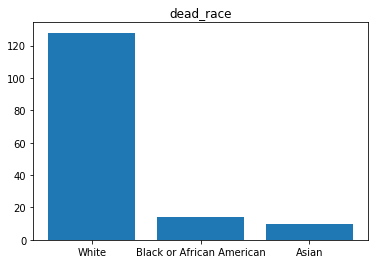

{'White': 128, 'Black or African American': 14, 'Asian': 10}


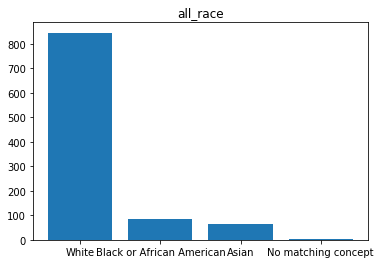

{'White': 845, 'Black or African American': 86, 'Asian': 65, 'No matching concept': 4}
                            dead  all  percent
White                      128.0  845     15.0
Black or African American   14.0   86     16.0
Asian                       10.0   65     15.0
No matching concept          NaN    4      NaN


In [81]:
#죽은 사람들의 인종
dead_race_result = get_data('person', 'race', True)
draw_bar_chart(dead_race_result[1], "dead_race")
print(dead_race_result[1])

#모든 사람들의 인종
all_race_result = get_data('person', 'race', False)
draw_bar_chart(all_race_result[1], "all_race")
print(all_race_result[1])

#table로 정리
get_table(dead_race_result[1], all_race_result[1])

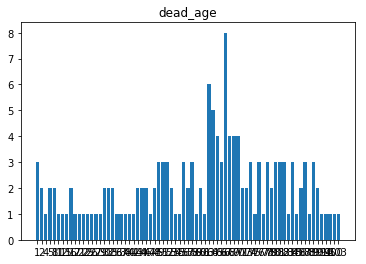

{'1': 3, '2': 2, '4': 1, '5': 2, '8': 2, '11': 1, '12': 1, '15': 1, '16': 2, '17': 1, '21': 1, '22': 1, '25': 1, '26': 1, '27': 1, '29': 1, '30': 2, '32': 2, '35': 2, '36': 1, '37': 1, '38': 1, '40': 1, '42': 1, '43': 2, '44': 2, '46': 2, '47': 1, '48': 2, '49': 3, '51': 3, '52': 3, '53': 2, '54': 1, '55': 1, '56': 3, '57': 2, '58': 3, '59': 1, '60': 2, '61': 1, '63': 6, '64': 5, '65': 4, '66': 3, '67': 8, '68': 4, '69': 4, '70': 4, '71': 2, '73': 2, '74': 3, '75': 1, '76': 3, '77': 1, '78': 3, '79': 2, '80': 3, '81': 3, '82': 3, '83': 1, '84': 3, '85': 1, '86': 2, '87': 3, '88': 1, '89': 3, '90': 2, '91': 1, '94': 1, '95': 1, '100': 1, '103': 1}


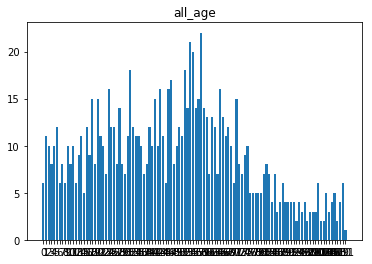

{'0': 6, '1': 11, '2': 10, '3': 8, '4': 10, '5': 12, '6': 6, '7': 8, '8': 6, '9': 10, '10': 8, '11': 10, '12': 6, '13': 9, '14': 11, '15': 5, '16': 12, '17': 9, '18': 15, '19': 8, '20': 15, '21': 11, '22': 10, '23': 7, '24': 16, '25': 12, '26': 12, '27': 8, '28': 14, '29': 8, '30': 7, '31': 11, '32': 18, '33': 12, '34': 11, '35': 11, '36': 10, '37': 7, '38': 8, '39': 12, '40': 10, '41': 15, '42': 10, '43': 16, '44': 11, '45': 6, '46': 16, '47': 17, '48': 8, '49': 10, '50': 12, '51': 11, '52': 18, '53': 14, '54': 21, '55': 20, '56': 14, '57': 15, '58': 22, '59': 14, '60': 13, '61': 7, '62': 13, '63': 12, '64': 7, '65': 16, '66': 13, '67': 11, '68': 12, '69': 10, '70': 6, '71': 15, '72': 8, '73': 7, '74': 9, '75': 10, '76': 5, '77': 5, '78': 5, '79': 5, '80': 5, '81': 7, '82': 8, '83': 7, '84': 4, '85': 7, '86': 3, '87': 4, '88': 6, '89': 4, '90': 4, '91': 4, '92': 4, '93': 2, '94': 4, '95': 3, '96': 4, '97': 2, '98': 3, '99': 3, '100': 3, '101': 6, '102': 2, '103': 2, '104': 5, '105': 3

In [82]:
#죽은 사람들의 나이
dead_age_result = get_data_age(True)
draw_bar_chart(dead_age_result[1], "dead_age")
print(dead_age_result[1])

#모든 사람들의 나이
all_age_result = get_data_age(False)
draw_bar_chart(all_age_result[1], "all_age")
print(all_age_result[1])

#table로 정리
get_table(dead_age_result[1], all_age_result[1])

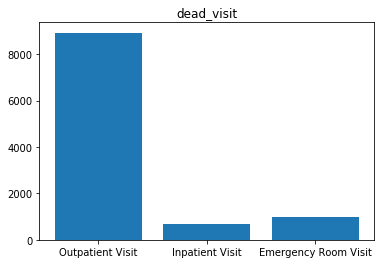

{'Outpatient Visit': 8925, 'Inpatient Visit': 660, 'Emergency Room Visit': 981}


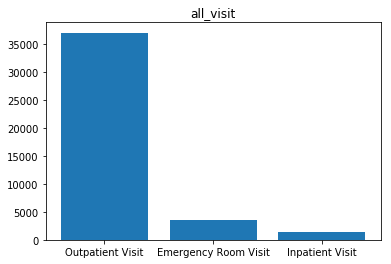

{'Outpatient Visit': 37026, 'Emergency Room Visit': 3475, 'Inpatient Visit': 1309}
                      dead    all  percent
Outpatient Visit      8925  37026       24
Emergency Room Visit   981   3475       28
Inpatient Visit        660   1309       50


In [83]:
#죽은 사람들의 방문 유형
dead_visit_result = get_data('visit_occurrence', 'visit', True)
draw_bar_chart(dead_visit_result[1], "dead_visit")
print(dead_visit_result[1])

#모든 사람들의 방문 유형
all_visit_result = get_data('visit_occurrence', 'visit', False)
draw_bar_chart(all_visit_result[1], "all_visit")
print(all_visit_result[1])

#table로 정리
get_table(dead_visit_result[1], all_visit_result[1])

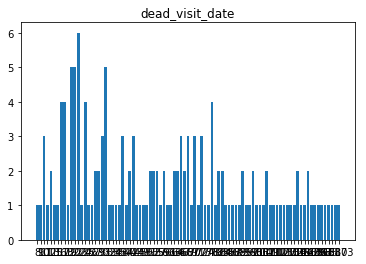

{'8': 1, '9': 1, '10': 3, '11': 1, '12': 2, '13': 1, '15': 1, '16': 4, '17': 4, '18': 1, '19': 5, '20': 5, '22': 6, '23': 1, '24': 4, '25': 1, '26': 1, '27': 2, '29': 2, '30': 3, '31': 5, '32': 1, '33': 1, '34': 1, '35': 1, '36': 3, '37': 1, '40': 2, '42': 3, '43': 1, '45': 1, '49': 1, '50': 1, '51': 2, '52': 2, '55': 2, '57': 1, '59': 2, '60': 1, '61': 1, '63': 2, '64': 2, '66': 3, '67': 2, '68': 3, '69': 1, '70': 3, '71': 1, '72': 3, '73': 1, '74': 1, '76': 4, '79': 1, '82': 2, '83': 2, '84': 1, '85': 1, '86': 1, '87': 1, '88': 1, '93': 2, '95': 1, '96': 1, '97': 2, '98': 1, '103': 1, '104': 1, '107': 2, '109': 1, '110': 1, '111': 1, '117': 1, '121': 1, '127': 1, '130': 1, '132': 1, '136': 2, '139': 1, '144': 1, '150': 2, '160': 1, '168': 1, '186': 1, '293': 1, '311': 1, '635': 1, '658': 1, '1610': 1, '18873': 1}


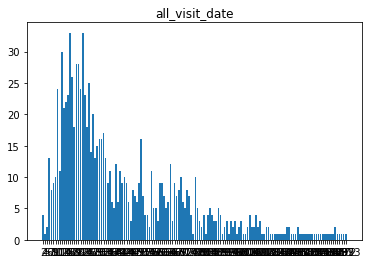

{'2': 4, '4': 1, '5': 2, '6': 13, '7': 8, '8': 9, '9': 10, '10': 24, '11': 11, '12': 30, '13': 21, '14': 22, '15': 23, '16': 33, '17': 26, '18': 18, '19': 28, '20': 28, '21': 24, '22': 33, '23': 23, '24': 18, '25': 25, '26': 14, '27': 20, '28': 13, '29': 15, '30': 16, '31': 16, '32': 17, '33': 13, '34': 9, '35': 11, '36': 6, '37': 5, '38': 12, '39': 6, '40': 11, '41': 9, '42': 10, '43': 9, '44': 6, '45': 3, '46': 8, '47': 7, '48': 6, '49': 9, '50': 16, '51': 7, '52': 4, '53': 4, '54': 2, '55': 11, '56': 5, '57': 5, '58': 3, '59': 9, '60': 9, '61': 7, '62': 5, '63': 6, '64': 12, '65': 3, '66': 9, '67': 7, '68': 8, '69': 10, '70': 6, '71': 5, '72': 8, '73': 7, '74': 4, '75': 1, '76': 10, '77': 5, '78': 3, '79': 2, '80': 4, '81': 1, '82': 4, '83': 5, '84': 4, '85': 3, '86': 3, '87': 5, '88': 4, '89': 1, '90': 2, '91': 3, '92': 1, '93': 3, '94': 2, '95': 3, '96': 1, '97': 2, '98': 3, '100': 1, '101': 1, '102': 2, '103': 4, '104': 2, '106': 2, '107': 4, '109': 2, '110': 3, '111': 1, '112': 

In [84]:
#죽은 사람들의 총 내원 일수
dead_visit_date_result = get_data_visit(True)
draw_bar_chart(dead_visit_date_result[1], "dead_visit_date")
print(dead_visit_date_result[1])

#모든 사람들의 총 내원 일수
all_visit_date_result = get_data_visit(False)
draw_bar_chart(all_visit_date_result[1], "all_visit_date")
print(all_visit_date_result[1])

#table로 정리
get_table(dead_visit_date_result[1], all_visit_date_result[1])

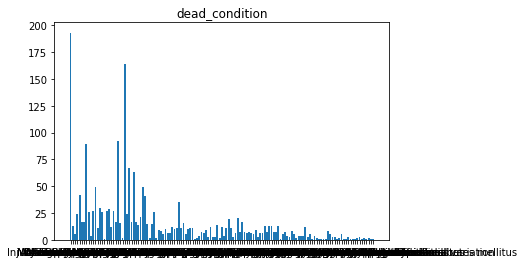

{'No matching concept': 193, 'Septic shock': 13, 'Tubal pregnancy': 5, 'Cough': 24, 'Pneumonia': 42, 'Dyspnea': 17, 'Wheezing': 17, 'Acute viral pharyngitis': 89, 'Miscarriage in first trimester': 26, 'Malignant tumor of breast': 4, 'Acute respiratory failure': 27, 'Essential hypertension': 49, 'Acute deep venous thrombosis': 11, 'Disease caused by 2019-nCoV': 30, 'Sepsis caused by virus': 26, 'Chronic congestive heart failure': 1, 'Hypoxemia': 27, 'Fever': 29, 'Injury of kidney': 12, 'Respiratory distress': 27, 'Acute respiratory distress syndrome': 17, 'Acute bronchitis': 92, 'Seizure disorder': 16, 'Injury of tendon of the rotator cuff of shoulder': 2, 'Viral sinusitis': 164, 'Neoplasm of prostate': 24, 'Anemia': 67, 'Atrial fibrillation': 17, 'Impaired glucose tolerance': 63, 'Carcinoma in situ of prostate': 17, 'Osteoporosis': 14, 'Cerebrovascular accident': 21, 'Chronic sinusitis': 49, 'Coronary arteriosclerosis': 41, 'Otitis media': 15, 'Tear of meniscus of knee': 2, 'Sinusitis'

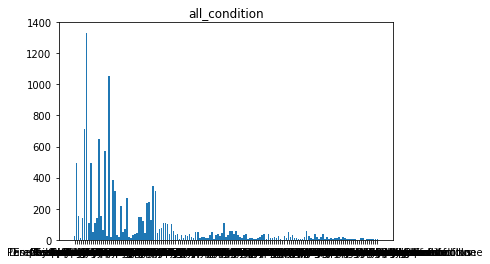

{'Tubal pregnancy': 25, 'Cough': 496, 'Pneumonia': 153, 'Emphysematous bronchitis': 10, 'Respiratory distress': 138, 'Disease caused by 2019-nCoV': 710, 'No matching concept': 1332, 'Sprain of ankle': 106, 'Acute bronchitis': 496, 'Cerebrovascular accident': 52, 'Hyperlipidemia': 107, 'Hypoxemia': 138, 'Fever': 649, 'Miscarriage in first trimester': 156, 'Osteoarthritis of knee': 63, 'Acute viral pharyngitis': 569, 'Epidermal burn of skin': 24, 'Viral sinusitis': 1051, 'Childhood asthma': 20, 'Normal pregnancy': 382, 'Anemia': 311, 'Nausea': 32, 'Atopic dermatitis': 16, 'Chronic sinusitis': 217, 'Acute bacterial sinusitis': 52, 'Sinusitis': 69, 'Fatigue': 272, 'Perennial allergic rhinitis with seasonal variation': 19, 'Acute allergic reaction': 11, 'Vomiting symptom': 32, 'Fracture subluxation of wrist': 37, 'Facial laceration': 42, 'Wheezing': 146, 'Dyspnea': 146, 'Streptococcal sore throat': 120, 'Sprain of wrist': 42, 'Sputum finding': 235, 'Essential hypertension': 244, 'Otitis med

In [85]:
#죽은 사람들의 진단(병명)
dead_condition_result = get_data('condition_occurrence', 'condition', True)
draw_bar_chart(dead_condition_result[1], "dead_condition")
print(dead_condition_result[1])

#모든 사람들의 진단(병명)
all_condition_result = get_data('condition_occurrence', 'condition', False)
draw_bar_chart(all_condition_result[1], "all_condition")
print(all_condition_result[1])

#table로 정리
get_table(dead_condition_result[1], all_condition_result[1])

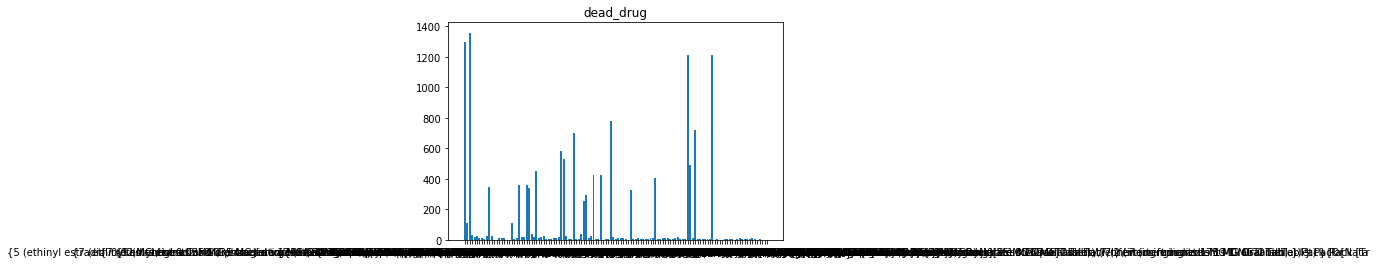

{'hydrochlorothiazide 25 MG Oral Tablet': 1298, 'tetanus and diphtheria toxoids, adsorbed, preservative free, for adult use (5 Lf of tetanus toxoid and 2 Lf of diphtheria toxoid)': 108, 'Influenza, seasonal, injectable, preservative free': 1358, 'pneumococcal polysaccharide vaccine, 23 valent': 29, 'pneumococcal conjugate vaccine, 13 valent': 19, '1 ML enoxaparin sodium 150 MG/ML Prefilled Syringe': 23, '1 ML vasopressin (USP) 20 UNT/ML Injection': 13, '4 ML norepinephrine 1 MG/ML Injection': 13, '0.3 ML enoxaparin sodium 100 MG/ML Prefilled Syringe': 4, 'acetaminophen 500 MG Oral Tablet': 27, 'NDA020503 200 ACTUAT albuterol 0.09 MG/ACTUAT Metered Dose Inhaler': 343, '0.4 ML enoxaparin sodium 100 MG/ML Prefilled Syringe': 22, '24 HR metoprolol succinate 100 MG Extended Release Oral Tablet [Toprol]': 1, 'tamoxifen 10 MG Oral Tablet': 1, 'piperacillin 4000 MG / tazobactam 500 MG Injection': 14, 'vancomycin 1000 MG Injection': 14, 'albuterol 5 MG/ML Inhalation Solution': 11, '10 ML furose

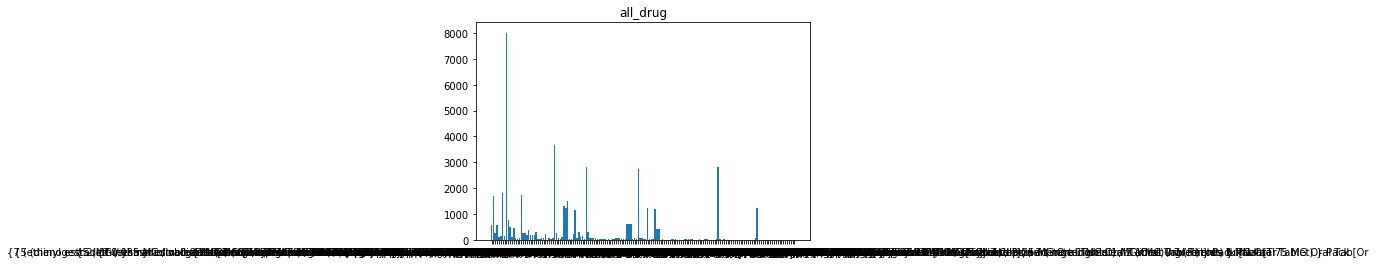

{'60 ACTUAT fluticasone propionate 0.25 MG/ACTUAT / salmeterol 0.05 MG/ACTUAT Dry Powder Inhaler': 569, 'simvastatin 10 MG Oral Tablet': 1681, 'naproxen sodium 220 MG Oral Tablet': 270, 'acetaminophen 325 MG Oral Tablet': 565, 'acetaminophen 21.7 MG/ML / dextromethorphan hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution': 123, '0.4 ML enoxaparin sodium 100 MG/ML Prefilled Syringe': 133, 'NDA020503 200 ACTUAT albuterol 0.09 MG/ACTUAT Metered Dose Inhaler': 1802, 'acetaminophen 500 MG Oral Tablet': 138, 'Influenza, seasonal, injectable, preservative free': 8015, 'tetanus and diphtheria toxoids, adsorbed, preservative free, for adult use (5 Lf of tetanus toxoid and 2 Lf of diphtheria toxoid)': 754, 'pneumococcal conjugate vaccine, 13 valent': 497, 'pneumococcal polysaccharide vaccine, 23 valent': 100, 'diphtheria, tetanus toxoids and acellular pertussis vaccine': 451, 'ibuprofen 100 MG Oral Tablet': 89, 'loratadine 5 MG Chewable Tablet': 31, 'NDA020800 0.3 ML epinephri

In [86]:

#죽은 사람들의 의약품
dead_drug_result = get_data('drug_exposure', 'drug', True)
draw_bar_chart(dead_drug_result[1], "dead_drug")
print(dead_drug_result[1])

#모든 사람들의 의약품
all_drug_result = get_data('drug_exposure', 'drug', False)
draw_bar_chart(all_drug_result[1], "all_drug")
print(all_drug_result[1])

#table로 정리
get_table(dead_drug_result[1], all_drug_result[1])

In [91]:
print(dead_condition_result[0][0])

['1059760' 'No matching concept']


In [94]:
x = list()
for index in range(0, len(dead_condition_result[0])):
    x.append(dead_condition_result[0][index])
    
y = list()
for index in range(0, len(dead_drug_result[0])):
    y.append(dead_drug_result[0][index])

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding
one_hot = OneHotEncoder()
one_hot.fit(x)

x_one_hot = one_hot.transform(x).toarray()


#학습
lr = LinearRegression()
returns = lr.fit(x_one_hot, y)

import statsmodels.api as sm

mod = sm.OLS(y,x_one_hot)

fii = mod.fit()

print(fii.summary())

ValueError: Found input variables with inconsistent numbers of samples: [1939, 13979]